

# Project: Investigating No-Show Medical Appointments in Brazil


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>  

<a id='intro'></a>
## Introduction
>In this Project dataset will be analyzed. This dataest includes information collected from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointments.The original source of the dataset is [kaggle](https://www.kaggle.com/datasets/joniarroba/noshowappointments).
>
>The Dataset includes the following column names: (PatientId, AppointmentID, Gender, ScheduleDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_recieved and No_show)
>
>Where:
>
>-**ScheduleDay** is a day in which patient sets up its appointment.
>
>-**Neighbourhood** is location of the hospital.
>
>-**Schoalrship** is whether or not patient has Brasilian Welfar Program Membership [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia).
>
>-**No_show** indicates if a patient showed up to the appointment by saying 'No'. And by saying 'yes' it indicates that patient did not show up.
>
>
>In particular, I will be interested in finding trends among the patients who did not showed up and how they differ from patients who did show up by asking the following questions:
>
>>    1- **Are patients more likely to show up for appointments compared to those who did not show up?**
>
>>    2-**Does Age Affects Patient Attendance to Appointment?**
>
>>    3-**Does Gender Affects Patient Attendance to Appointment ?**
>
>>    4-**Does Health Status Affects Patient Attendance to Appointment ?**
>
>>    5-**Does Receiving SMS Affects Patient Attendance to Appointment ?**
>
>>    6-**Does Having Scholarship Affects Patient Attendance to Appointment ?**
>
>>    7-**Does Neighbourhood Affects Patient Attendance to Appointment ?**
>
>>    8-**Does Waiting Period Affects Patient Attendance to Appointment ?**
>
>>    9-**What is The Most Attending Day Among The Days of Week ?**Does It Affect Attendance ?

In [354]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

>In this section data is loaded. Data structure is discussed by performing the following operations to inspect: data shape, types, descriptive statistics, missing data or duplicates. After that cleaning process starts by performing operations of renaming/adding columns, changing data types if required and droping unnecessary columns.

### General Properties

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
#Getting number of columns and rows in data
df.shape

(110527, 14)

>Data has **14 columns** and **110527 samples**

In [11]:
#Getting types of data included in columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

>It is clear that **PatientId** and **AppointmentID**  need to be changed to **string type** data because they are fixed data.

In [12]:
#Getting descriptive statistics information about data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From statistics above we can  see that **ages range** is between -1 and 115 and negative value needs to be dropped. The **mean** of ages is 37.  Scholarship, Hipertension, Diabetes, Alcoholism and SMS_recieved all are True and False data (**boolean**) because they only contain 0 and 1. **Handcap** has values **between 0 and 4** and this needs to change to True and False because it does not make sense in our case to know the degee of handicap. 

In [13]:
#searching for duplicates
df.duplicated().sum()

0

>There are **no duplicates** in data.

In [14]:
#searching for missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


>There are **no missing data**.

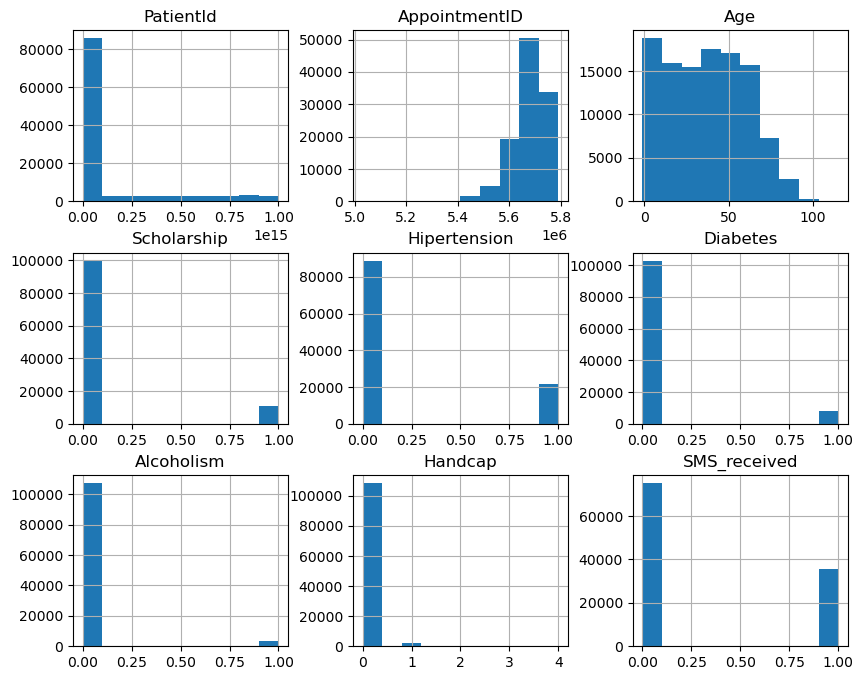

In [15]:
#getting general idea about data distributions
df.hist(figsize=(10,8));

>From histograms above the **most attending ages** approximately are **between 0 and 8** years old and the **least attending ages** are **between 90 and more than 100** years old. The **majority** of patients **does not have** **scholarship, hipertension, Diabetes alcoholism and are not handicaped**. Also, **around half** of **patients** **received** phone **messages**.

In [16]:
#counting male and female
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

>It is clear that **Female** patients are **more than Male** Patients

In [17]:
#count Patient IDs
df['PatientId'].nunique()

62299

> Since **62299** is **less than number of rows of dataset**. It is clear that **some Patients had more than one appointment**.

In [18]:
#counting Appointment IDs
df['AppointmentID'].nunique()

110527

> This **equals the same** as **number of rows of data** and it indicates that **appointment Ids are unique**.

In [19]:
#searching for ages less than 0
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


>Only **one row** contains **negative value** that needs to be dropped.

In [20]:
#getting unique values of Handcap
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

>As said before **Handcap values** need to be **changed to 0 and 1** by replacing 2,3 and 4 with 1.

In [21]:
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [22]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

> It is clear that number of **patients who did show up** to their appointments are **more than** those **who did not show up**.

### Data Cleaning 

In [23]:
#viewing the first row headings to check the title names
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> **Renaming** columns (**Hipertension and Handcap**) that contain wrong spellings and **convert - to _ in No-show** column

In [24]:
#correcting the spelling of columns: hipertension and Handcap
#replacing - with _ in No_show column
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'No-show':'No_show'}, inplace=True)
df.rename(columns={'Handcap':'Handicap'}, inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>From wrangling data it is clear that the ***only negative value is -1** in **ages**. So **row** that contains -1 is **deleted** below.

In [25]:
#drop row containing age = -1
df.drop(df[df['Age']== -1].index, inplace=True)

>**Replacing** values **2,3 and 4** in **Handicap** **with 1** so they become boolean. And **'Yes' with 1** and **'No' with 0** in No_show.

In [26]:
#replacing values 2,3,4 with 1
df['Handicap'].replace([2,3,4],1, inplace=True)
df['No_show'].replace('Yes', 1, inplace=True)
df['No_show'].replace('No', 0, inplace=True)

>**PatientId** and **AppointmentID** types are float and integer types respectively. They are **changed into string** type so descriptive statistics can not be done on them because they are fixed data.
>
>**ScheuleDay** and **AppointmentDay** are  **changed from string type to datetime type** so that **date can be extracted** from them and the difference between them is calculated in new column called **Waiting_Period(days)**. These values are then can be plotted so that to see if the increment in waiting period prior the appointment affect patient attendance or not.
>
>**Day_of_appointment** is new column created by **extracting day name** from **datetime** **AppointmentDay** column. It is used later to visualize the most attending day.

In [27]:
#changing types of PatientId and AppointmentID to string type
df['PatientId']= df['PatientId'].apply(lambda x: str(int(x)))
df['AppointmentID'] = df['AppointmentID'].apply(lambda x: str(int(x)))

#change type of ScheduleDay and AppointmentDay to datetime 
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

#extracct date from ScheduleDay and AppointmentDay
df['Scheduled_Day'] = df['ScheduledDay'].dt.date
df['Appointment_Day'] = df['AppointmentDay'].dt.date
df['Day_of_appointment']=  df['AppointmentDay'].dt.day_name()

>After extracting dates and days from  **ScheduledDay** and **AppointmentDay** columns, they  are now **deleted**. Also **PatientId** column and  **AppointmentID column**

In [28]:
#drop unnecessary columns
df.drop('ScheduledDay', axis=1, inplace=True)
df.drop('AppointmentDay', axis=1, inplace=True)
df.drop('PatientId', axis=1, inplace=True)
df.drop('AppointmentID', axis=1, inplace=True)

>**Waiting_Period(days)column** is created and the **difference between Scheduled_Day and Appointment_Day** is set on it and it converted into number of days to be integer.

In [29]:
#creating new column 'Waiting_Period(days)'
df['Waiting_Period(days)']= (df['Appointment_Day'] - df['Scheduled_Day']).dt.days

>**Negative values** mean that the **appointment** day is **before** the **scheduled day** which is the day when the patient sets its appointment. So, since this does not make sense **these rows needed to be dropped** as below here.

In [30]:
#searching values less than 0 in Waiting_Period(days)column
df[df['Waiting_Period(days)'] < 0]

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_Day,Appointment_Day,Day_of_appointment,Waiting_Period(days)
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,1,2016-05-10,2016-05-09,Monday,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,2016-05-18,2016-05-17,Tuesday,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,1,2016-05-05,2016-05-04,Wednesday,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,2016-05-11,2016-05-05,Thursday,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,1,2016-05-04,2016-05-03,Tuesday,-1


In [31]:
#removing negative values in Waiting_Period(days) column
df.drop(df[df['Waiting_Period(days)'] < 0].index, inplace=True)

>**Splitting** the days of waiting period into **groups** that categorize the period long. These **categories** are then set using cut pandas method into **waiting_classifications column**.
>
>Bin labels and edges are set as follow based on the unique values of Waiting_Period(days) below:
>
>- same day: 0
>
>- less than week: 1-4
>
>- a week: 5-7
>- half a month: 8-15
>
>- a month: 16-30
>
>- month & half: 31-45
>
>- 2 months: 46-90
>
>- very long: 91-180

In [32]:
#viewing unique values of waiting period days
df['Waiting_Period(days)'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  80,
        86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,  90,
       151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122, 101,
       105,  92,  97,  93, 107,  95, 139, 132, 179, 117, 146, 123],
      dtype=int64)

In [33]:
#bin edges that will be used to cut data into groups
bin_edges= [-1,0,4,7,15,30,45,90,180]

In [34]:
#labels for the waiting_classifications groups
bin_names=['same day','less than week','a week', 'half a month', 'a month', 'month & half', '2 months','very long']

In [35]:
#creating waiting_classifications column
df['waiting_classifications']= pd.cut(df['Waiting_Period(days)'], bins=bin_edges, labels=bin_names)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Scheduled_Day,Appointment_Day,Day_of_appointment,Waiting_Period(days),waiting_classifications
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,Friday,0,same day
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,0,same day
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,0,same day
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,Friday,0,same day
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,Friday,0,same day


<a id='eda'></a>
## Exploratory Data Analysis

>In this section, data are explored by performing calculations and presenting data in visualizatoins to look for answers for the following questions: 
>
>>1- **Are patients more likely to show up for appointments compared to those who did not show up?**
>
>>2- **Does Age Affects Patient Attendance to Appointment?**
>
>>3- **Does Gender Affects Patient Attendance to Appointment ?**
>
>>4- **Does Health Status Affects Patient Attendance to Appointment ?**
>
>>5- **Does Receiving SMS Affects Patient Attendance to Appointment ?**
>
>>6- **Does Having Scholarship Affects Patient Attendance to Appointment ?**
>
>>7- **Does Neighbourhood Affects Patient Attendance to Appointment ?**
>
>>8- **Does Waiting Period Affects Patient Attendance to Appointment ?**
>
>>9- **What is The Most Attending Day Among The Days of Week ? Does It Affect Attendance ?**

### Research Question1 (Are patients more likely to show up for appointments compared to those who did not show up?)

In [355]:
#check unique values and types
df['No_show'].unique()

array([0, 1], dtype=int64)

In [141]:
df[df['No_show'] == 0].value_counts().sum()

88207

In [145]:
df[df['No_show'] == 1].value_counts().sum()

22314

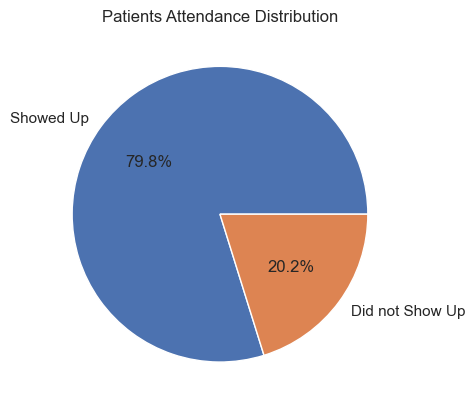

In [353]:
#pie chart for show and No show 
patient_show_count = df[df['No_show'] == 0].shape[0]
Patient_No_show_count = df[df['No_show'] == 1].shape[0]

#plot pie chart for show  and no_show appointments
labeles=['Showed Up', 'Did not Show Up']
sizes= [patient_show_count, Patient_No_show_count]
plt.pie(sizes, labels=labeles, autopct='%1.1f%%')
plt.title('Patients Attendance Distribution')
plt.show()

>It is clear that **patients** who **attended** appointments (88207) are **4 times more** than **patients** who **did not attend** (22314).

### Research Question 2 (**Does Age Affects Patient Attendance to Appointment?**)

In [43]:
df.Age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [226]:
#creating mask for patients who showed up and those who did not show up
no_show = df.No_show ==True
show = df.No_show==False

In [328]:
#Descriptive statistics of ages that did not show up
df.Age[no_show].describe()

count    22314.000000
mean        34.317872
std         21.965009
min          0.000000
25%         16.000000
50%         33.000000
75%         51.000000
max        115.000000
Name: Age, dtype: float64

In [329]:
#Descriptive statistics of ages that did show up
df.Age[show].describe()

count    88207.000000
mean        37.790504
std         23.338645
min          0.000000
25%         18.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

>From above **average age** in general is **37 years old**. And average age for **patients who showed up** is **37 years** **more than** average for thoes **who did not show up** which is **34 years**. Distribution of ages is plotted below to see that more clearly. 

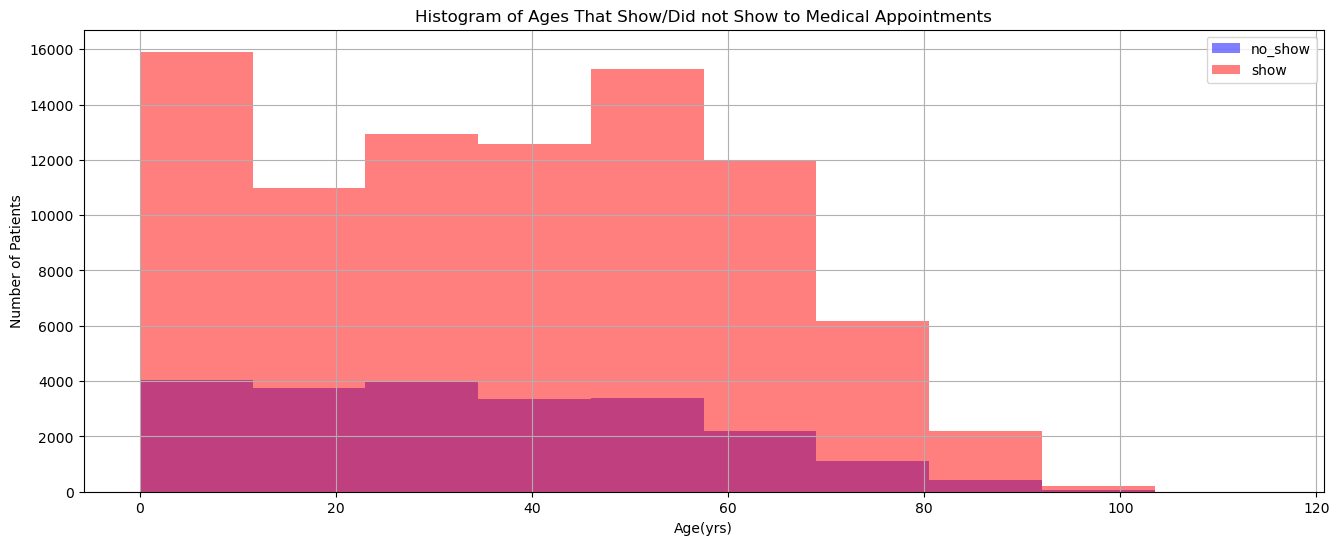

In [47]:
#plotting distribution of ages histogram
#figure size
plt.figure(figsize=[16,6])
#setting values of ages and mean of show and no_show histogram
df.Age[no_show].hist(alpha=0.5, bins=10, color='blue', label='no_show')
df.Age[show].hist(alpha=0.5, bins=10, color='red', label='show');
#insert legend
plt.legend();
# x and y labels and title
plt.title('Histogram of Ages That Show/Did not Show to Medical Appointments')
plt.xlabel('Age(yrs)')
plt.ylabel('Number of Patients');

>From Histogram given above it is clear that **distibution of  showeing up  ages** is **skewed to right**. It is clear that people attended are more than those who did not attend. And the **most attending ages** are **between 0 and 12** years old and they are around **15900 patients**. The **second most attending ages** are **between 45 and 57** years old approximetaly (arpound 15500 **patients**). The **least attending ages** are **between  92 and 115** years old approximetly (around **200 patients**)
>
> On the other side, **distibution of not showeing up  ages** is **skewed also to right**.  and the **most none attending ages** are **between 0 and 35 years** and the **least** one are **between  92 and 115** years old. 

### Research Question 3 (Does Gender Affects Patient Attendance to Appointment ?)

In [48]:
#count Female and Male
df.Gender.value_counts()

F    71836
M    38685
Name: Gender, dtype: int64

In [309]:
#grouping by Gender that show/no show
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       0          57245
        1          14591
M       0          30962
        1           7723
Name: No_show, dtype: int64

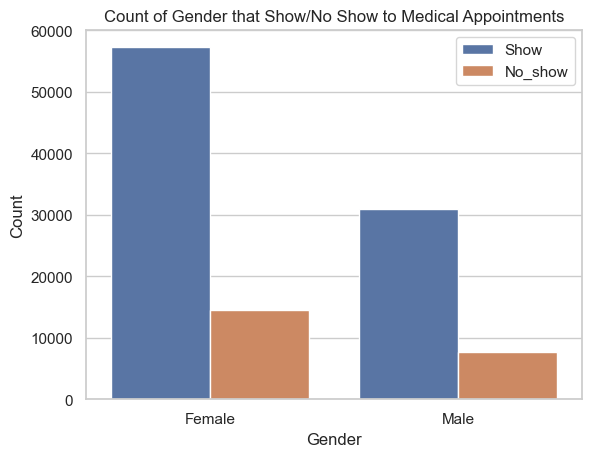

In [49]:
#plot count of gender for show/no show
sns.set(style='whitegrid')
fig, ax = plt.subplots()
ax=sns.countplot(data=df, x='Gender', hue='No_show')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0,1],['Female','Male'])
plt.title('Count of Gender that Show/No Show to Medical Appointments')
plt.legend(labels=['Show', 'No_show'])
plt.show()

>Since the number of **females (71836)** is larger than **males (38685)** it is more fair to compare between them by the percentage of patients who did not show to those who did show to the appointments of each gender by plotting another figure that presents proportions of gender. 

> **Function will be defined** that calculates the **percentages of show and no show for each independent variable** to plot them and we can use it later. 

In [261]:
#define function plots proportion of each gender who show and did not show
def plot_column_attendance (df, column, value):
     """Return the pie charts for column probability for show/no show"""
#count column value who showed and did not show
    show_counts = df[(df['No_show'] == 0)& (df[column] == value)].shape[0]
    No_show_counts = df[(df['No_show'] == 1)& (df[column] == value)].shape[0]

#calculate percentage of column value who show and did not show
    total = df[df[column] == value].shape[0]
    proportion_show = (show_counts/total)*100
    proportion_No_show = (No_show_counts/total)*100

#plot pie chart for show appointments
    labeles=['Showed Up', 'Did not Show Up']
    sizes = [proportion_show,proportion_No_show]
    plt.pie(sizes, labels=labeles, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title(f'Patients Having {column} Attendance Distribution' if value == 1 else f'Patients Not Having {column} Attendance Distribution' if value == 0 else 'Female Attendance Distribution' if value == 'F' else 'Male Attendance Distribution' if value == 'M' else f'{column} Attendance Distribution')

    plt.show();

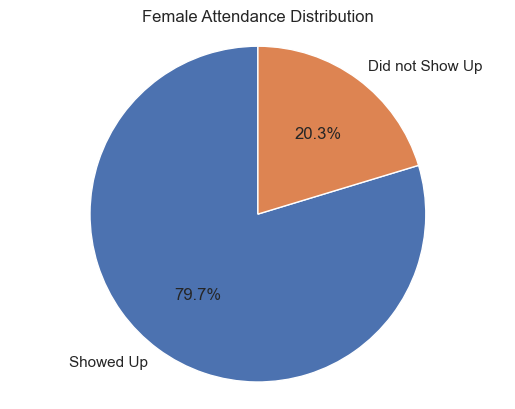

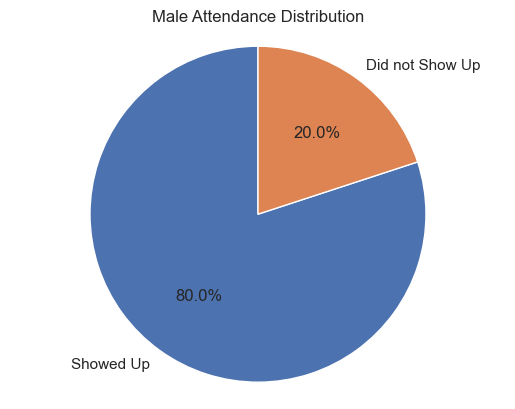

(None, None)

In [262]:
#plot Female gender who show and not show
#plot Male gender who show and not show
plot_column_attendance (df, 'Gender', 'F'), plot_column_attendance (df, 'Gender', 'M')

> Although **Females** are **more than Males** in both cases whether they attended or not, **but** the **ratios** of **patients attended** **to** **thoes who did not attend** is approximetaly **the same for both genders.**  

### Research Question 4 (Does Health status Affects Patient Attendance to Appointment ?)

> There are 4 chronic diseaese given in data (**Hypertension, Diabetes, Alcoholism and Handicap**). These can define the health status of patients and can be used to see if person having disease did he showed up or not to the medical appointment. 

In [154]:
#vcount patient have and no have chronic diseases (Hypertension, Diabetes, Alcoholism and Handicap)
df.Hypertension.value_counts(),df.Diabetes.value_counts(),df.Alcoholism.value_counts(),df.Handicap.value_counts()

(0    88720
 1    21801
 Name: Hypertension, dtype: int64,
 0    102578
 1      7943
 Name: Diabetes, dtype: int64,
 0    107161
 1      3360
 Name: Alcoholism, dtype: int64,
 0    108282
 1      2239
 Name: Handicap, dtype: int64)

In [277]:
#define function that calculates percentage of having disease
def percentage(column):
         """Return percentage of having disease"""
    percentage = (df.query(f'{column} == 1').value_counts().sum()/df[column].value_counts().sum())*100
    return percentage

In [281]:
#calculate percentage of having disease
percentage('Hypertension'),percentage('Diabetes'),percentage('Alcoholism'),percentage('Handicap')

(19.725662996172673, 7.186869463721826, 3.0401462165561295, 2.025859338949159)

>Obviously **Patients with chronic diseases are less than those who are fit and well**. Let us see how showing up to appointments is affected by having disease by ploting percentage of show/no show for each of these different health status.
>
>The are **19.7%** of patients have **hypertension** , **7.1%** have **diabetes**, **3.0%** have **alcoholism** and **2.0%** have **handicap**.

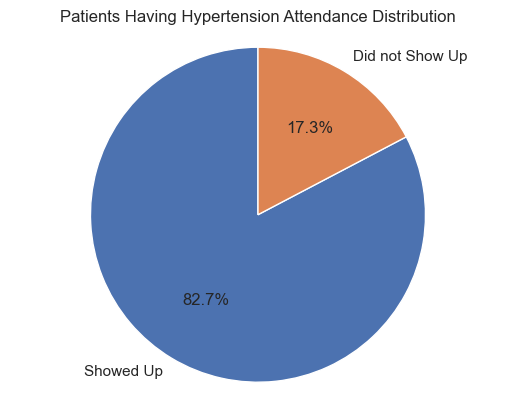

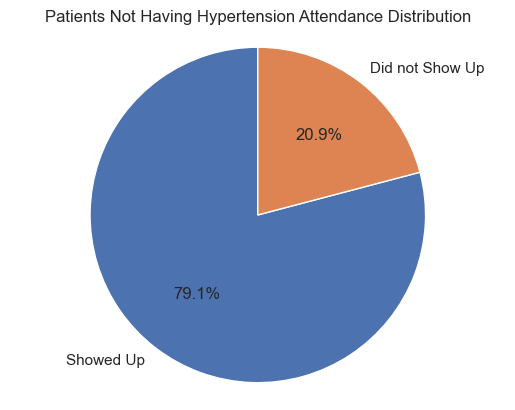

(None, None)

In [283]:
#plot pie chart showing percentage show/no show for those having Hypertension
#plot pie chart showing percentage show/no show for those dont have Hypertension
plot_column_attendance (df, 'Hypertension', 1),plot_column_attendance (df, 'Hypertension', 0)

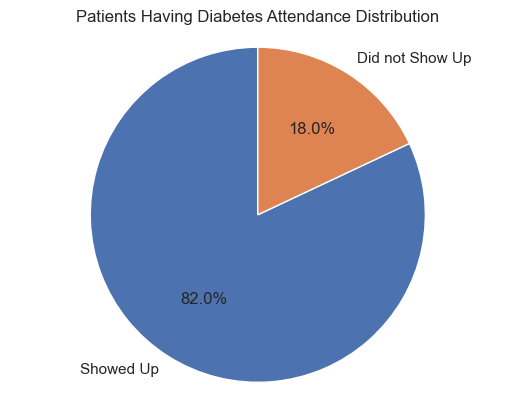

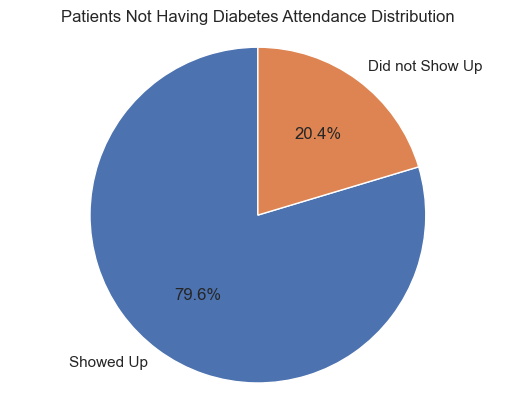

(None, None)

In [285]:
#plot pie chart showing percentage show/no show for those having Diabetes
#plot pie chart showing percentage show/no show for those dont have Diabetes
plot_column_attendance (df, 'Diabetes', 1), plot_column_attendance (df, 'Diabetes', 0) 

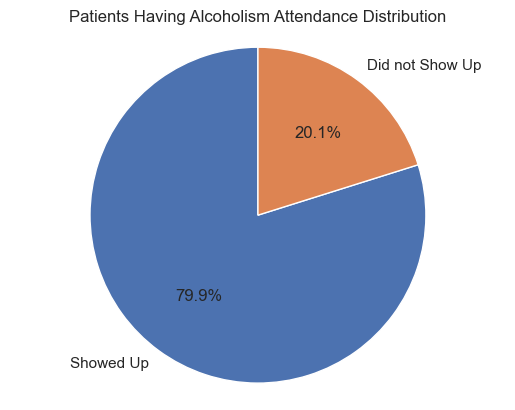

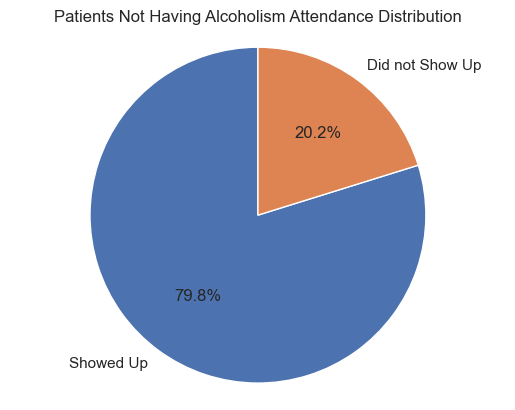

(None, None)

In [335]:
#plot pie chart showing percentage show/no show for those having Alcoholism
#plot pie chart showing percentage show/no show for those dont have Alcoholism
plot_column_attendance (df, 'Alcoholism', 1), plot_column_attendance (df, 'Alcoholism', 0) 

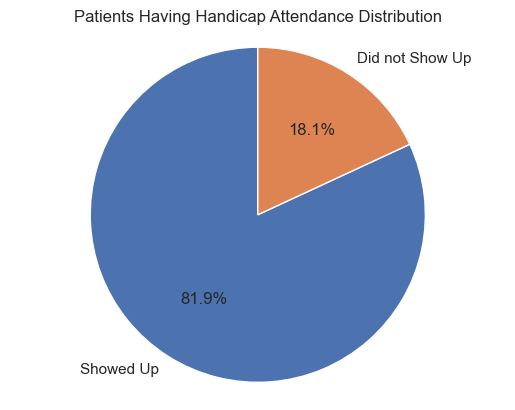

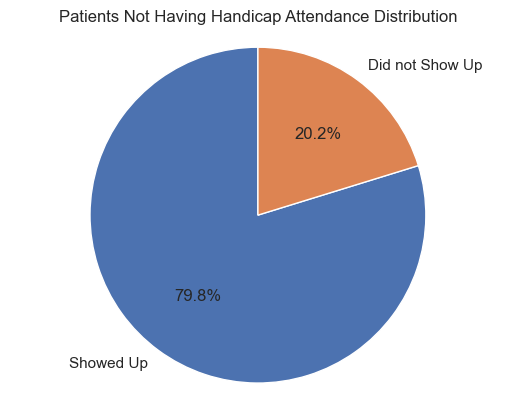

(None, None)

In [337]:
#plot pie chart showing percentage show/no show for those having Handicap
#plot pie chart showing percentage show/no show for those dont have Handicap
plot_column_attendance (df, 'Handicap', 1),plot_column_attendance (df, 'Handicap', 0)  

>Pie chatrs below for each disease show that patients who do not have **Hypertension, Diabetes, Alcoholism and Handicap** **missed their appointments** slightly more in comparsion to thoes who have disease.
>
> Also we can see that **perceentages** of **showing up and not showing up** for **people having/ not having  certain chronic diseases** are **very close** so there is no noticable change.

### Research Question 5 (Does Receiving SMS Affects Patient Attendance to Appointment ?)

In [62]:
#count patient received/did notreceive SMS
df.SMS_received.value_counts()

0    75039
1    35482
Name: SMS_received, dtype: int64

>Ii is clear that **patients did not receive SMS** (75039) are more than who **received SMS** (35482).

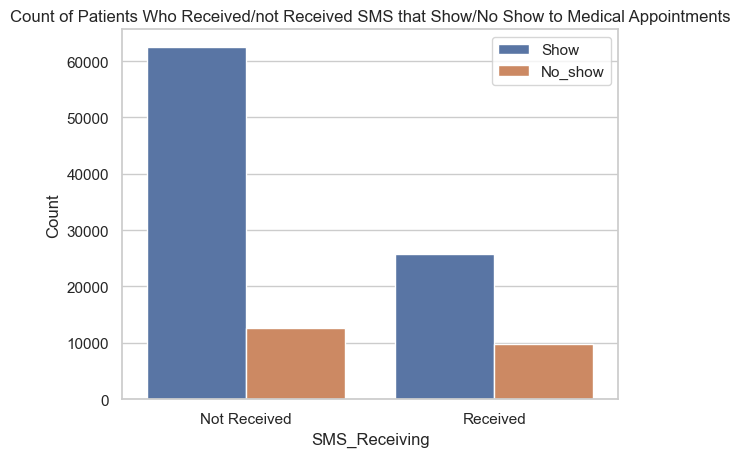

In [221]:
#plot count patient received/did notreceive SMS
sns.set(style='whitegrid')
fig, ax = plt.subplots()
ax=sns.countplot(data=df, x='SMS_received', hue='No_show')
plt.xlabel('SMS_Receiving')
plt.ylabel('Count')
plt.xticks([0,1],['Not Received','Received'])
plt.title('Count of Patients Who Received/not Received SMS that Show/No Show to Medical Appointments')
plt.legend(labels=['Show', 'No_show'])
plt.show()

>Ii is clear that **patients did not receive SMS** are **more comitted to attending** appointments than than thoes **received SMS**. This also can be seen in the pie charts below that **27.6% of patients received SMS did not show up** in comparion to **16.7% patients did not receive SMS  and did not show up**. 

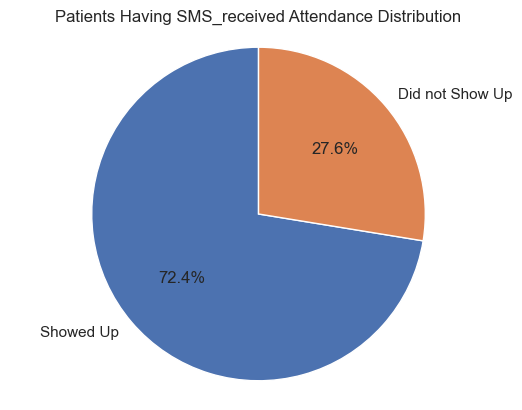

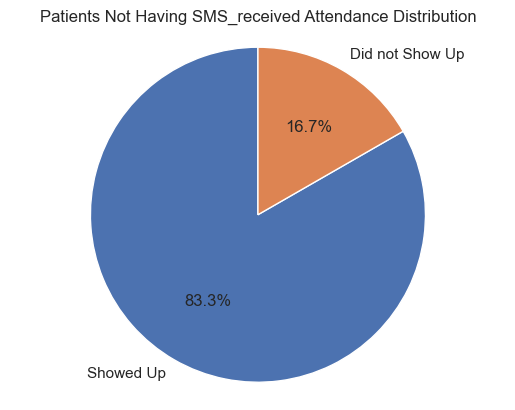

(None, None)

In [311]:
#plot pie chart showing percentage show/no show for those having SMS_received
#plot pie chart showing percentage show/no show for those dont have SMS_received
plot_column_attendance (df, 'SMS_received', 1), plot_column_attendance (df, 'SMS_received', 0)

### Research Question 6 (Does Having Scholarship  Affects Patient Attendance to Appointment ?)

In [225]:
#count patients have/no have scholarship
df.Scholarship.value_counts()

0    99660
1    10861
Name: Scholarship, dtype: int64

> It is clear that **patients** who **do not have scholarship** (99660) are **more than** thoes who have **sholarship**(10861).

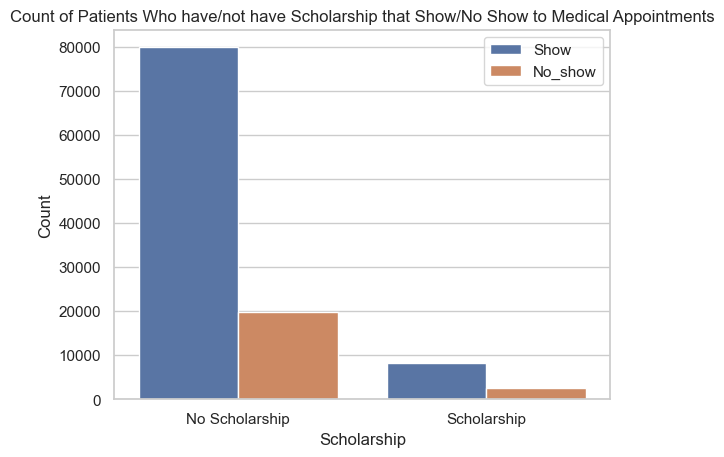

In [222]:
#plot count patients have/no have scholarship who show/no show
sns.set(style='whitegrid')
fig, ax = plt.subplots()
ax=sns.countplot(data=df, x='Scholarship', hue='No_show')
plt.xlabel('Scholarship')
plt.ylabel('Count')
plt.xticks([0,1],['No Scholarship','Scholarship'])
plt.title('Count of Patients Who have/not have Scholarship that Show/No Show to Medical Appointments')
plt.legend(labels=['Show', 'No_show'])
plt.show()

>It is clear that **patients** who have **no scholarship** **showed up more** than those who have scholarship. And from pie chart below **percentage of not showing up** for thoes **having scholrship (23.7%)** is more than for thoes **do not have scholarship (19.8%)**. 

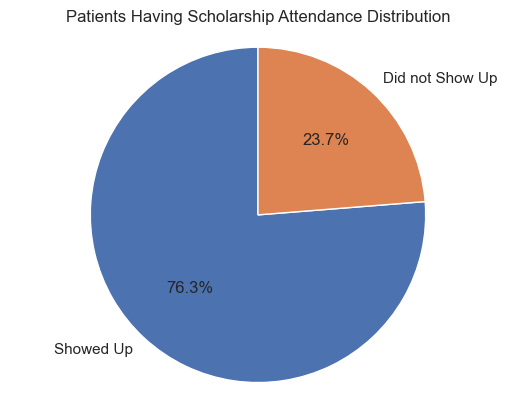

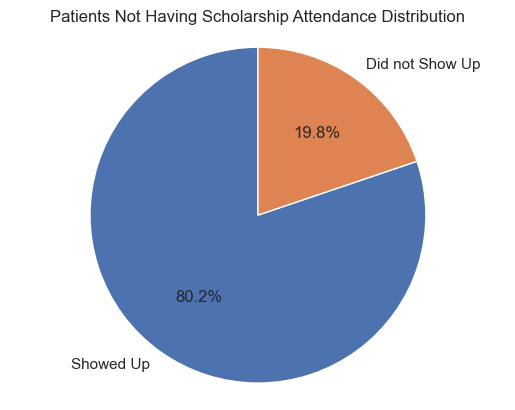

(None, None)

In [312]:
#plot pie chart showing percentage show/no show for those having scholarship
#plot pie chart showing percentage show/no show for those dont have Sscholarship
plot_column_attendance (df, 'Scholarship', 1), plot_column_attendance (df, 'Scholarship', 0)

### Research Question 7 (Does Neighbourhood Affects Patient Attendance to Appointment ?)

In [308]:
#getting the most frequent neighbourhood
df['Neighbourhood'].mode()

0    JARDIM CAMBURI
dtype: object

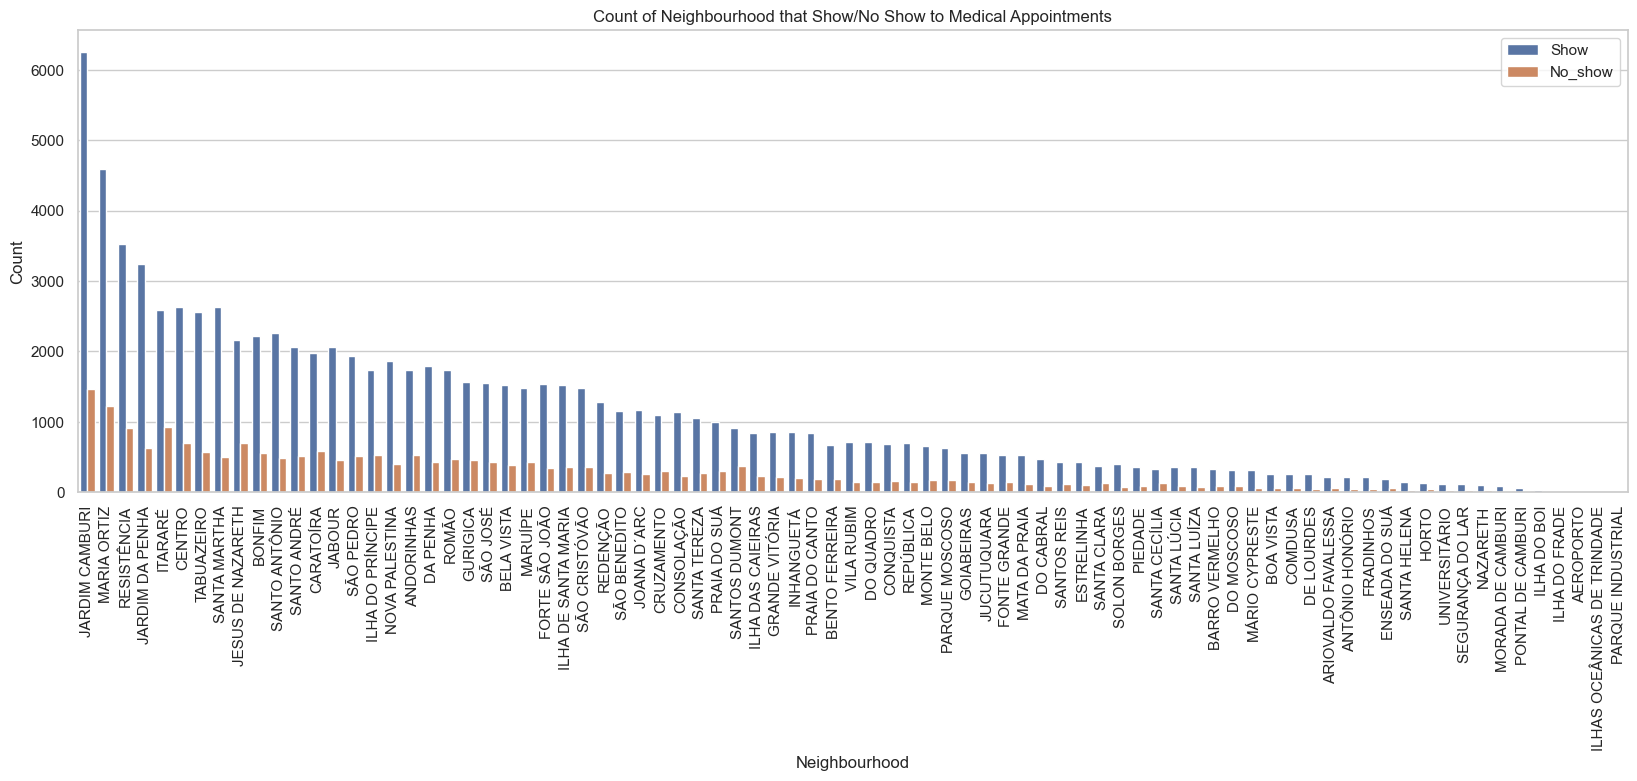

In [69]:
#plot neighbourhood show/no show distribution
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(20,6))
order= df['Neighbourhood'].value_counts().sort_values(ascending=False).index
ax=sns.countplot(x=df.Neighbourhood, hue=df.No_show, order=order)
ax.set_xlabel('Neighbourhood')
ax.set_ylabel('Count')
ax.set_title('Count of Neighbourhood that Show/No Show to Medical Appointments')
ax.legend(labels=['Show', 'No_show'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

> **Most of Patients** are **attending** their appointments where the hospital is located in **JARDIM CAMBURI neighbourhood**. And the **distibution of showing up** to appointments follow the **same distribution** for **not showing up** for all neighbourhoods.

### Research Question 8 (**Does Waiting Period Affects Patient Attendance to Appointment ?**)

In [307]:
#calculate mean waiting day
df['Waiting_Period(days)'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Waiting_Period(days), dtype: float64

> **The average waiting days** (days between schedule day and appointment day is **10 days** with **minimun** waiting days **0 days** and **maximum 179 days**.

> Below **grouping** data by **waiting_classifications and No_show** for the **calculation pf proportions** of **no_show and show** based on **different waiting classifications** then **visualizing** them **using bar plot**.

In [70]:
#data grouped by waiting_classifications and No_show using and being counted
waiting_classifications_counts = df.groupby(['waiting_classifications','No_show']).count()['Handicap']
waiting_classifications_counts

waiting_classifications  No_show
same day                 0          36770
                         1           1792
less than week           0          15375
                         1           4590
a week                   0           9038
                         1           3182
half a month             0           9362
                         1           4166
a month                  0          10709
                         1           5159
month & half             0           4264
                         1           2241
2 months                 0           2528
                         1           1128
very long                0            161
                         1             56
Name: Handicap, dtype: int64

In [374]:
#define function calculates probabilities and plot bar chart
def probability_bar_plot(show, no_showw, classifications):
     """Return the bar chart for column probability for show/no show"""
        
#from above arrays probability of each category is calculated using numpy
#total count for each classification (show and no show)
    total = np.array(no_showw)+ np.array(show)
#proportion (show/no show) for each waiting classification 
    proportion_no_show = np.array(no_showw)/total
    proportion_show = np.array(show)/total

#creating bar chart using matblotlip 
#position bars sides by side
    x = np.arange(len(classifications))
    width = 0.35
    plt.bar(x - width/2,proportion_no_show,width,label='No Show')
    plt.bar(x + width/2,proportion_show,width,label='Show')

#set x and y labels and title
    plt.ylabel('Proportion')
    plt.xlabel('Waiting Classification' if classifications == waiting_classifications else 'Day of Appointment' if classifications == Day_of_appointmentt else 'Default')
    plt.title('Proportions of No Show/Show Appointments By Waiting Classifications' if classifications == waiting_classifications else 'Proportions of No Show/Show Appointments By Appointment Day' if classifications == Day_of_appointmentt else 'Default Title')
#set the tick labels waiting_classifications on the x axis and rotate them 45 degree.
    plt.xticks(x,classifications, rotation=45)
#add legend
    plt.legend()

    plt.show()

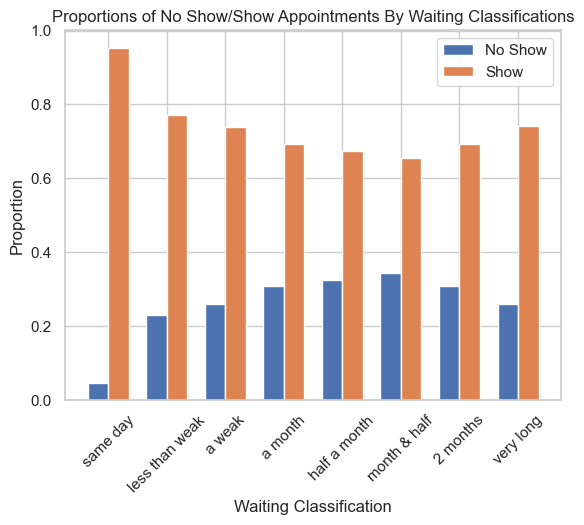

In [375]:
waiting_classifications = ['same day', 'less than weak', 'a weak','a month', 'half a month','month & half', '2 months', 'very long']
no_showw = [1792, 4590, 3182, 4166, 5159, 2241, 1128, 56]
show = [36770, 15375, 9038, 9362, 10709, 4264, 2528, 161]
#call defined function
probability_bar_plot(show, no_showw, waiting_classifications);

>From figure above it is clear that the **probability** of patient **not showing** to the appointment is overall **increasing** as waiting period increases except **after** waiting period of **half a month** there is **a decrese** in the probability.
On the other side the opposite is happening for the **ratio of showing up**. It **decreses with the increase in waiting period until month & hlaf** then it **rises again**.

### Research Question 9 (What is The Most Attending Day Among The Days of Week ? Does It Affect Attendance ?)

In [72]:
#finding mode day
df.Day_of_appointment.mode()

0    Wednesday
dtype: object

In [346]:
#value counts for days
df.Day_of_appointment.value_counts()

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: Day_of_appointment, dtype: int64

> The **most frequent day** for appointments is **Wednesday** followed by **Tuesday** and then **Monday**. The **least frequent** one is **Saturday**. 

In [74]:
#grouping data by day and No_how
df.groupby(['Day_of_appointment', 'No_show']).count()['Handicap']

Day_of_appointment  No_show
Friday              0          14982
                    1           4037
Monday              0          18024
                    1           4689
Saturday            0             30
                    1              9
Thursday            0          13909
                    1           3337
Tuesday             0          20488
                    1           5150
Wednesday           0          20774
                    1           5092
Name: Handicap, dtype: int64

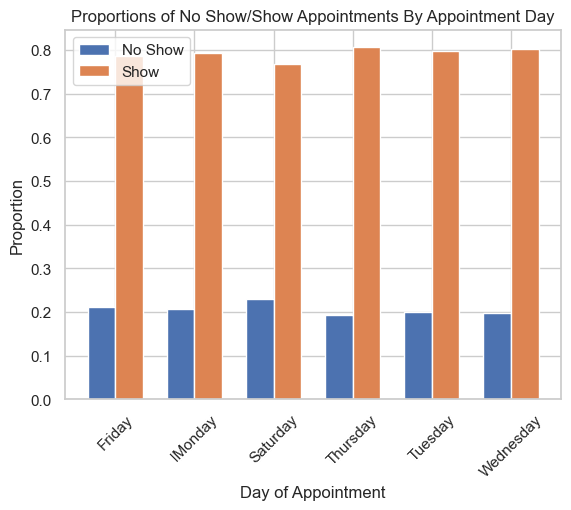

In [376]:
#from above counts arrays are written to use them in calculations and plot
Day_of_appointmentt = ['Friday', 'lMonday', 'Saturday','Thursday', 'Tuesday','Wednesday']
no_showw = [4037, 4689, 9, 3337, 5150, 5092]
show = [14982, 18024, 30, 13909, 20488, 20774]

#call defined function
probability_bar_plot(show, no_showw, Day_of_appointmentt);

>From above figure it is can be seen that **probabilities** of patient  to **show up ** is ** highest for thursday** and **then for wednesday**. The **least attending day is saturday**.

## Limitations
- There were data that contain unreasonable values and they are negative age value and few rows that contain appointment day before schedule day. These rows containing thoes values were dropped because they were few.

<a id='conclusions'></a>
## Conclusions

> Finally, after performing data wrangling and Exploratory Data Analysis the following points were obtained:
>
>>- **Patients whow showed up** 80% to appointments were **more than those who did not show up 20%**.
>
>>- **The most attending** ages are **children below 12 years** and **mid-age people** which are **between 45 and 57** years. So, **age has effect** on patient **attending to medical appointment**.
>
>>- It is true that female who attended are more than males attended but this is because female patients are more than male patients. So, by comparing precentages of show/no show for each gender alone it can be seen that they are almost equal and can be said that **there is no effect of gender on attending medical appointments**.
>
>>- **There is a slight effect of having disease** (Hypertension, Diabetes, Alcoholism and Handicap) **on showing up to appointments**. People with no diseases tend to miss up their medical appointments than thoes who have diseases.
>
>>- It is noticable that percentage of people who did not show up for thoes recevied SMS is more than thoes who did not receive SMS. **It is clear that SMS campaign has no effect on letting people attend their  medical appointments**.
>
>>- **Having scholarship did not increase the probability of attending appointments**. Patients with no scholarship are more committed to attend medical appointments.
> 
>>- **Distribution of Show and no show for neighbourhood follow the same trend and where JARDIM CAMBURI is the location where most of patients are whether attending or not.**
>
>>- **It is noticable that as the waiting period increase the probability of patients not showing increases** but there is turning point where the probability of not showing decreases which is after half a month. 
>
>>- The most **preferable days** for appointments for patients are **Wednesday** followed by **Tuesday**. The **probability of attending is highest on thursday** and is the **lowest on saturday**. It can be said that day selecting has effect on patient attending.
